# dbscan

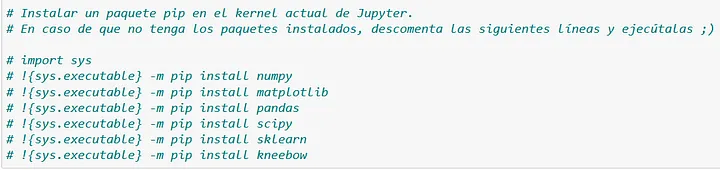

In [1]:
#IMPORTAR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneebow.rotor import Rotor

C:\Users\diana\AppData\Local\Temp\ipykernel_9768\3753295555.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#DATOS
df = pd.read_csv('Mall_Customers.csv')

#almaenando solo ingresos anuales y score de gastos
df = df.iloc[:, [3,4]].values

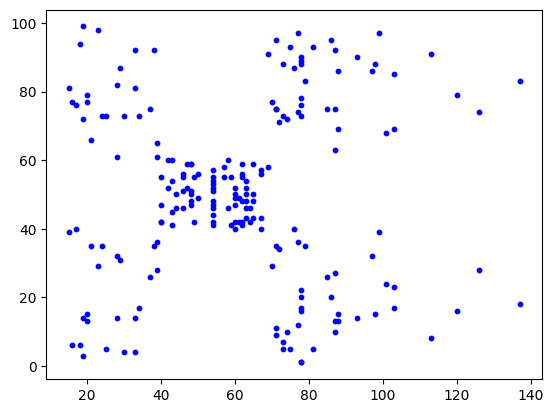

In [3]:
plt.scatter(df[:,0], df[:,1], s=10, c='blue')

In [4]:
#Calculo de distancia
def calculate_kn_distance(X, neigh=2):
    neigh = NearestNeighbors(n_neighbors=neigh)
    nbrs = neigh.fit(X)
    distances, indices = nbrs.kneighbors(X)
    return distances[:,1:].reshape(-1)

#cal de epsilon
def get_eps(X, neigh=2):
    eps_dist = np.sort(calculate_kn_distance(X, neigh=neigh))
    rotor = Rotor()
    curve_xy = np.concatenate([np.arange(eps_dist.shape[0]).reshape(-1,1), eps_dist.reshape(-1,1)],1)
    rotor.fit_rotate(curve_xy)
    rotor.plot_elbow()
    e_idx = rotor.get_elbow_index()
    return curve_xy[e_idx]

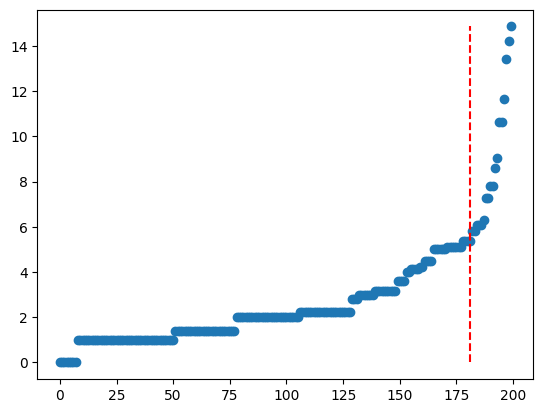

5.385164807134504


In [5]:
idx, eps = get_eps(df)

plt.show()

print(eps)

In [6]:
#calcular DBSCAN
#eps = 5.38564..... -> 5
clusters = DBSCAN(eps=5, min_samples=5).fit(df)

#etiquetas de datos
#desde -1 = ruido, hasta 4
labels = clusters.labels_

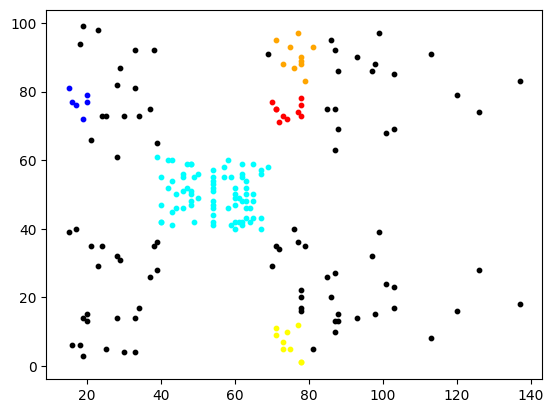

In [7]:
#NUEVA GRAFICA CON LOS GRUPOS CREADOS

plt.scatter(df[labels == -1,0], df[labels == -1,1], s=10, c='black') 
plt.scatter(df[labels == 0,0], df[labels == 0,1], s=10, c='blue')
plt.scatter(df[labels == 1,0], df[labels == 1,1], s=10, c='cyan')  
plt.scatter(df[labels == 2,0], df[labels == 2,1], s=10, c='red')
plt.scatter(df[labels == 3,0], df[labels == 3,1], s=10, c='yellow')
plt.scatter(df[labels == 4,0], df[labels == 4,1], s=10, c='orange')  
plt.show()  